In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ParisHousingclass.csv')

In [3]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [4]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [7]:
df['category'].unique()

array(['Basic', 'Luxury'], dtype=object)

In [8]:
df['category'].replace('Basic',0,inplace = True)

In [9]:
df['category'].replace('Luxury',1,inplace = True)

In [10]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0


In [11]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [12]:
from scipy import stats
skew = stats.skew(df.describe())
print('Skewness', skew)

Skewness [0.45135233 2.26744464 2.26778678 2.26778678 2.26744184 0.43282625
 2.26778379 2.26778378 2.00027643 2.26778678 2.26778678 0.03891918
 0.04337337 2.23500918 2.26778678 2.26778316 0.35882683 2.2677868 ]


In [13]:
log_transform = np.log(skew)
print('Log-Transform', log_transform)

Log-Transform [-0.79550703  0.81865349  0.81880437  0.81880437  0.81865225 -0.83741891
  0.81880305  0.81880305  0.69328539  0.81880437  0.81880437 -3.24626814
 -3.13790952  0.80424533  0.81880437  0.81880277 -1.02491538  0.81880438]


In [14]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 28.8529338201935
Q3: 10000.0
Q1: 1.0
IQR: 9999.0


In [15]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [16]:
upper_array = np.where(df.describe() >= upper)[0]
lower_array = np.where(df.describe() <= lower)[0]
 

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (9994, 18)


In [17]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,0
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,0
10,23563,21,0,1,90,91058,6,8,1993,1,0,703,852,684,1,10,2366397.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0


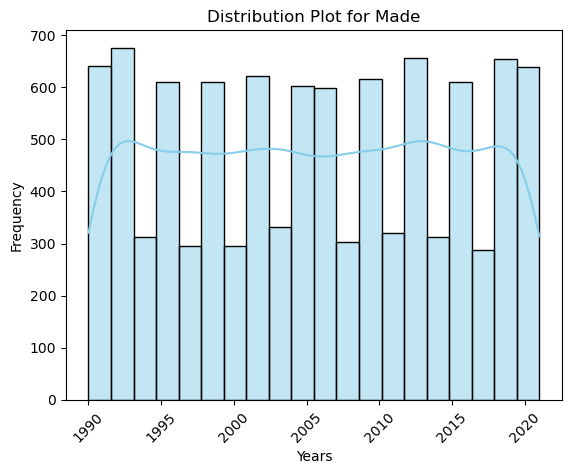

In [18]:
sns.histplot(df['made'], kde=True, color='skyblue')
plt.title('Distribution Plot for Made')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

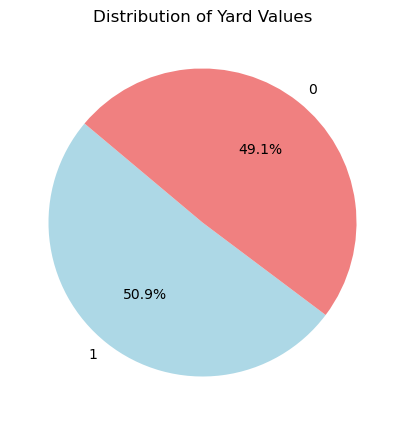

In [19]:
count_phones = df['hasYard'].value_counts()


labels = count_phones.index
sizes = count_phones.values
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Yard Values')
plt.show()

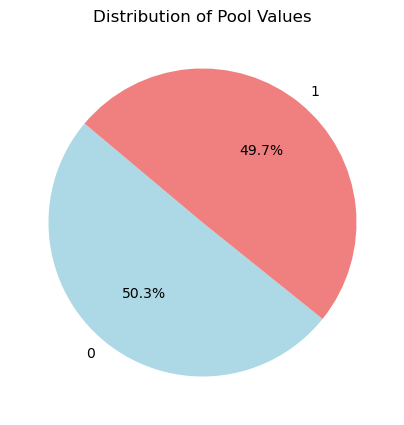

In [20]:
count_phones = df['hasPool'].value_counts()


labels = count_phones.index
sizes = count_phones.values
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pool Values')
plt.show()

# KNN

In [21]:
y = df['category']
x = df.drop(['category'],axis = 1)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)

In [23]:
x_train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
4106,76956,68,0,1,54,29273,7,8,2015,1,0,4462,1403,630,0,2,7699229.5
2592,31421,23,0,1,28,18747,10,2,2005,1,0,9438,8360,357,0,8,3148839.5
9200,77591,36,1,0,79,48726,8,7,2002,1,0,7732,7509,127,0,1,7767753.2
2008,49411,29,0,1,8,21931,10,3,2002,0,1,3249,3056,969,0,1,4944414.2
7231,50660,42,1,0,74,15301,8,2,2016,0,0,3389,8498,955,1,0,5074190.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,79169,22,0,0,39,28205,2,4,2010,1,0,5102,5828,464,1,4,7918220.0
5197,17901,47,0,0,23,12588,1,1,2021,0,1,8653,1519,734,1,6,1791955.1
5396,38355,80,1,1,22,75266,8,7,1992,0,0,5234,2855,487,0,3,3840740.2
866,35778,92,0,0,35,16239,6,8,2012,0,1,4151,4653,669,1,9,3580006.2


In [24]:
x_test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
3131,63519,91,1,1,31,62197,6,2,2006,0,1,1001,5368,938,1,10,6358243.6
1447,94129,29,0,0,81,87582,9,1,1998,0,1,6578,8860,254,0,3,9419500.8
4516,45803,17,0,1,21,3710,6,7,1997,0,0,1749,9521,444,0,2,4583642.7
45,92696,49,1,0,38,74381,9,2,2021,0,0,1559,5111,957,1,2,9272740.1
4515,464,16,0,1,53,84350,5,10,2006,1,1,5816,8915,830,1,5,52352.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,26017,75,0,0,65,96609,1,6,1999,0,0,709,8076,950,1,7,2603509.9
1567,15118,74,1,0,28,55870,6,2,2014,1,0,6483,9938,944,1,6,1514316.4
1676,30144,93,1,1,94,75883,5,3,2019,0,1,7886,4098,253,0,4,3024682.9
6957,27428,23,0,0,61,26581,4,8,2008,1,0,5843,4867,369,0,4,2746938.8


In [25]:
y_train

4106    0
2592    0
9200    0
2008    0
7231    0
       ..
5740    0
5197    0
5396    0
866     0
7276    0
Name: category, Length: 7995, dtype: int64

In [26]:
y_test

3131    0
1447    0
4516    0
45      0
4515    0
       ..
9962    0
1567    0
1676    0
6957    0
3916    0
Name: category, Length: 1999, dtype: int64

In [27]:
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

In [28]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
import numpy as np
x_test = np.array(x_test)

In [30]:
y_pred = knn_model.predict(x_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8429214607303652


In [32]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1673   81]
 [ 233   12]]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1754
           1       0.13      0.05      0.07       245

    accuracy                           0.84      1999
   macro avg       0.50      0.50      0.49      1999
weighted avg       0.79      0.84      0.81      1999



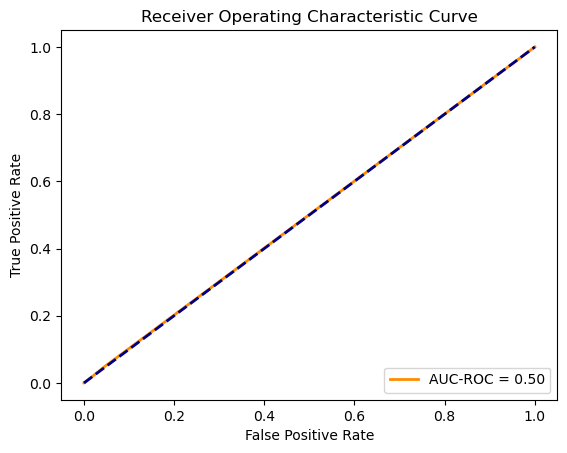

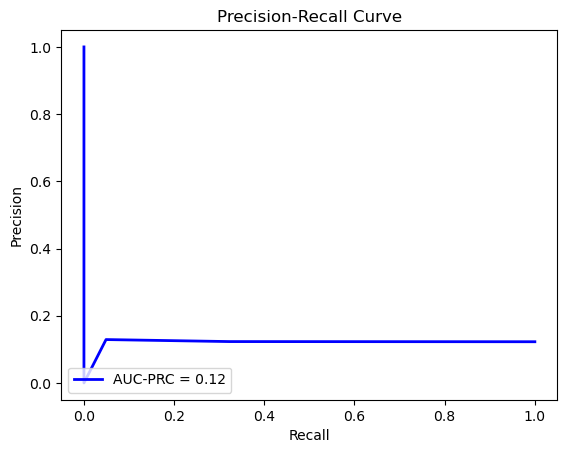

In [34]:
y_pred_proba = knn_model.predict_proba(x_test)

y_scores = y_pred_proba[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_scores)
prc_auc = auc(recall, precision)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'AUC-PRC = {prc_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Navie Bayes

In [35]:
model = GaussianNB()

In [36]:
model.fit(x_train, y_train)

GaussianNB()

In [37]:
predictions = model.predict(x_test)

In [38]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', acc)

Accuracy : 0.8429214607303652


In [39]:
f1 = f1_score(y_test, y_pred)
print('f1 score is',f1)

f1 score is 0.07100591715976332


In [40]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1673   81]
 [ 233   12]]


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1754
           1       0.13      0.05      0.07       245

    accuracy                           0.84      1999
   macro avg       0.50      0.50      0.49      1999
weighted avg       0.79      0.84      0.81      1999



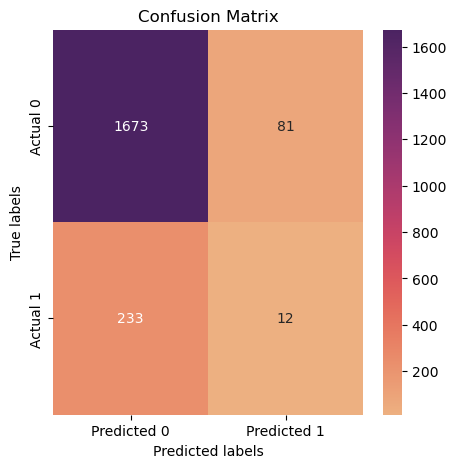

In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_prc = auc(recall, precision)
print("AUC-PRC Score:", auc_prc)

AUC-ROC Score: 0.5013997161008075
AUC-PRC Score: 0.14728506452041032
